<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/3%20-%20Pandas%20-%20Data%20Cleaning/Exercises/solutions_w3/Exercise1_week3_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# EDA and data visualization

## Exercises

In this exercise you're going to put in practice what you just learned and implement the same types of charts.<br>
Thoses chart will help you to answer questions.

For this, we're going to use the same data-set we used in the walkthroughs.<br>

***Beware ! You need to clean the data-set to be able to answer the questions ;)***

## 1. Imports, data set and cleaning

###1.1 Imports

First, you have to import the libraries you wil need. 

In [ ]:
#do the imports here
#Don't forget to import seaborn and scatter_matrix
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


###1.2 Load the data-set

Here is the url to retreive the data set : https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Telco-Customer-Churn.csv




In [ ]:
# import data set 
data = pd.read_csv("https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.3 Converting column types


In [ ]:
#Take a look at the column types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Convert Total Charges to numeric, use error = 'coerce'
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# What columns can be converted to the categorical type?
# Convert 3 of themthem here

data["gender"] = data["gender"].astype("category")
data["InternetService"] = data["InternetService"].astype("category")
data["PaymentMethod"] = data["PaymentMethod"].astype("category")


### 1.4 Boolean values

Remeber that boolean values are either True or False. Use the `value_counts()` function to see what values compose the `seniorCitizen` column.

In [ ]:
data["SeniorCitizen"].value_counts()

If you did it right, you should see that the column is composed only of 0's and 1's. We could change the 1's for `True` and the 0's for `False`.

You can use the `astype` function for this, just pass 'bool' as an argument instead of 'category'.

What other columns can be converted to this type? Convert at least 3 of them.

In [ ]:
data["SeniorCitizen"] = data["SeniorCitizen"].astype("bool")
data["Partner"] = data["Partner"].astype("bool")
data["Dependents"] = data["Dependents"].astype("bool")

###1.5 Cleaning the NaN value

Now since the data set contains NaN values, you will need to clean first before the Analysis. 

In [ ]:
data.isnull().sum()

In [ ]:
data.shape

In [ ]:
data = data.dropna()

##2. First analysis
**question:**
What is the proportion of women in our Data?

In [ ]:
values = data["gender"].value_counts()
proportion = values["Female"]/(values["Female"] + values["Male"])

print("Women account for {}% of our customers.".format(round(proportion*100,2 )))

Women account for 49.53% of our customers.


##3. Histogram

Now, plot an histogram of the `TotalCharges` column, use 20 bins.


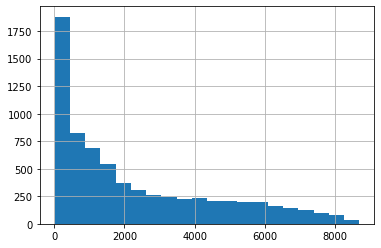

In [ ]:
data["TotalCharges"].hist(bins = 20)

##4. Boxplot

**question:** What are the mean, median, min and the value of the third quartile of the `MonthlyCharges` and `TotalCharges` ?<br>

Plot both in one figure


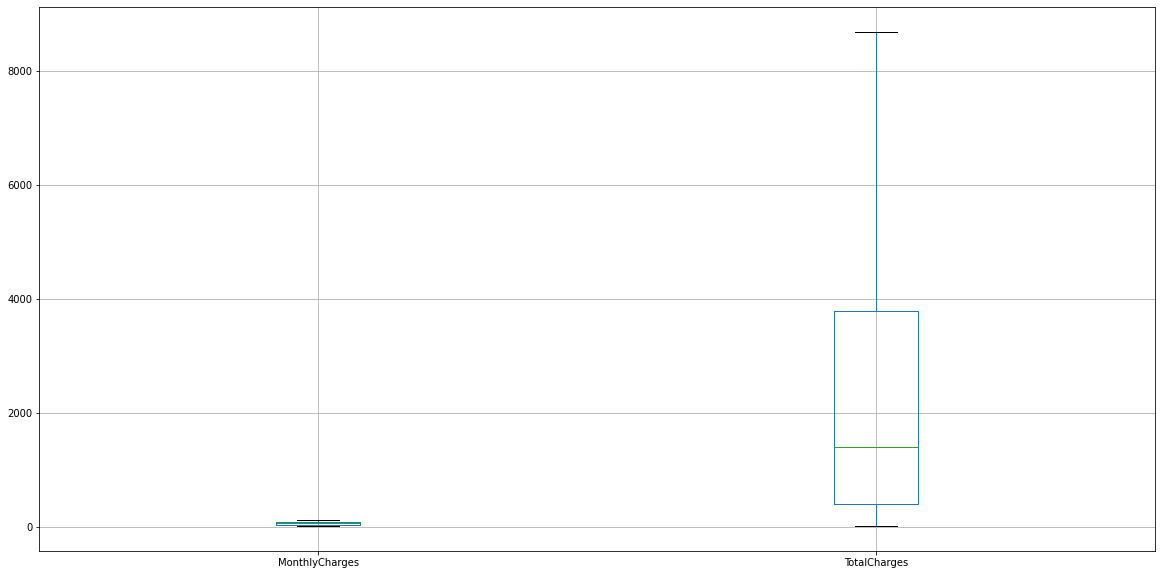

In [ ]:
#here for the visualization
data.boxplot(column = ["MonthlyCharges", "TotalCharges"], figsize = (20,10))

In [ ]:
#here for the numerical
data[["MonthlyCharges", "TotalCharges"]].describe()

,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


## 5. Scatter Plot and lines


### 5.1 Scatter plot
**question:** Is there a correlation between the `MonthlyCharges` and the `TotalCharges` ?

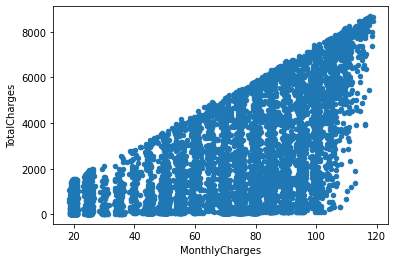

In [ ]:
scat = data.plot.scatter(x = "MonthlyCharges", y = "TotalCharges")

### 5.2 Pair Grid
**question:** could you find any correlation between one of those values: `tenure`, `MonthlyCharges`, `TotalCharges` ?
 (Use scatterplot)

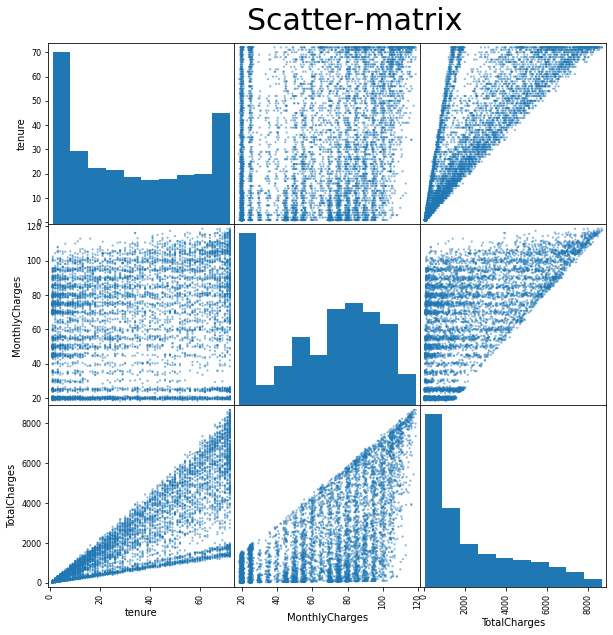

In [ ]:
scat2 = scatter_matrix(data[["tenure", "MonthlyCharges", "TotalCharges"]], figsize=(10, 10), grid=True, s = 20)
plt.suptitle('Scatter-matrix', size = 30, y = 0.93, x =0.55)
plt.show()



## 6. Heatmap and correlations
Calculate the correlation DataFrame, and plot its heatmap.

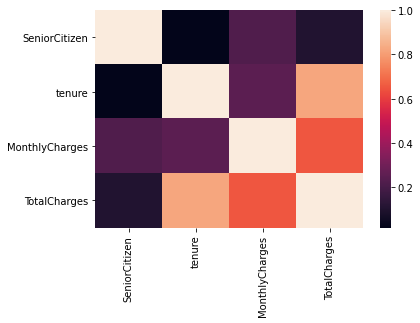

In [ ]:
correlations = data.corr()
heatmap = sns.heatmap(correlations)